In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
data = pd.read_excel('rolling_stones_spotify.xlsx')

In [7]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[['danceability', 'energy']])

C:\Users\Vimal Gopan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


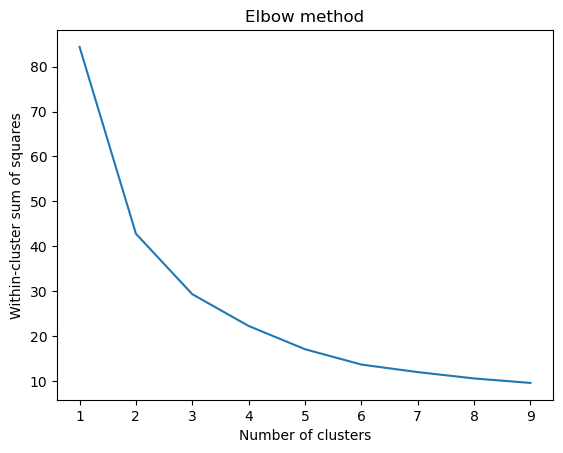

In [8]:
# Calculate the WCSS for different numbers of clusters
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
    

# Plot the WCSS curve
import matplotlib.pyplot as plt
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow method')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_pca)

KMeans(n_clusters=6)

In [11]:
cluster_labels = kmeans.predict(data_pca)

In [12]:
silhouette_score = silhouette_score(data_pca, cluster_labels)
print('Silhouette score:', silhouette_score)

Silhouette score: 0.3910337261916842


In [22]:
cohorts = {}
for cluster_label in range(6):
    cohorts[cluster_label] = []

for i in range(len(data_pca)):
    cluster_label = cluster_labels[i]
    cohorts[cluster_label].append(data_pca[i, 0])